In [5]:
import numpy as np
import matplotlib.pyplot as plt
import nufit
from scipy.interpolate import CubicSpline

In [6]:
file_names = [
    "RMFK_Results/mass-300-life-0.010.npz", 
    "RMFK_Results/mass-300-life-0.013.npz",
    "RMFK_Results/mass-300-life-0.017.npz",
    "RMFK_Results/mass-300-life-0.022.npz",
    "RMFK_Results/mass-300-life-0.030.npz",
    "RMFK_Results/mass-300-life-0.040.npz",
    "RMFK_Results/mass-300-life-0.053.npz",
    "RMFK_Results/mass-300-life-0.070.npz",
    "RMFK_Results/mass-300-life-0.093.npz",
    "RMFK_Results/mass-300-life-0.122.npz",
    "RMFK_Results/mass-300-life-0.166.npz",
    "RMFK_Results/mass-300-life-0.221.npz",
    "RMFK_Results/mass-300-life-0.282.npz",
    "RMFK_Results/mass-300-life-0.373.npz",
    "RMFK_Results/mass-300-life-0.517.npz",
    "RMFK_Results/mass-300-life-0.664.npz",
    "RMFK_Results/mass-300-life-0.912.npz",
    "RMFK_Results/mass-300-life-1.236.npz",
    "RMFK_Results/mass-300-life-1.495.npz",
    "RMFK_Results/mass-300-life-1.846.npz"
]

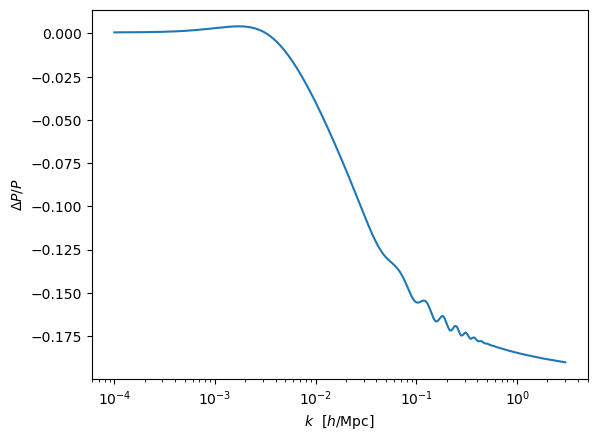

In [9]:
masses = np.linspace(0.05, 0.45, 20)
T, N, B, oneoverd = nufit.v_masses_sterile(0.1, True, file_names[7], "test", make_plot=True, sum_mnu_filename=True, coeffs = True)
ster_model = np.load("test312.npz", allow_pickle = True)

In [10]:
print(B)

0.020100502512562814


In [7]:
name = f"{0.1}meV"
nufit.v_masses_std(0.1, True, name)
std_model = np.load(f"{name}.npz", allow_pickle=True)

In [ ]:
LCDM = np.load("LambdaCDM.npz", allow_pickle=True)

def mps_diff_ster(mass_val, input_file, t = None):
    name = f"small_mnu:{mass_val}"

    if t is None:
        T, N, B, oneoverd = nufit.v_masses_sterile(mass_val, True, input_file, name, coeffs=True)

    else: 
        T, N, B, oneoverd = nufit.v_masses_sterile(mass_val, True, input_file, name, coeffs=True, parameter = t)

    nu_out = np.load(f"{name}.npz", allow_pickle=True)
    return nu_out, T, N, B, oneoverd

def mps_diff_std(mass_val, plot):
    name = f"{mass_val}meV"
    nufit.v_masses_std(mass_val, True, name)
    nu_mass_val = np.load(f"{name}.npz", allow_pickle=True)

    if plot == True:
        plt.figure()
        plt.semilogx(nu_mass_val['k_n_array'], (nu_mass_val['Pk_n_array']-LCDM['Pk_LambdaCDM'])/LCDM['Pk_LambdaCDM'])
        plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
        plt.ylabel(r'$\Delta P / P$')
        plt.title(f"Matter Power Spectrum Differences of Lambda-CDM with $M_ν$ = {mass_val*1000} meV and $M_ν$ = 0")

    return nu_mass_val